In [1]:
# # переключиться на полуточную арифметику (float16)

# import tensorflow as tf
# from tensorflow.keras.mixed_precision import Policy
# policy = Policy('mixed_float16')
# tf.keras.mixed_precision.set_global_policy(policy)

# Включить mixed precision для RTX 4070
from tensorflow.keras import mixed_precision
import tensorflow as tf

tf.config.optimizer.set_jit(True)  # Включение XLA-компиляции

#policy = mixed_precision.Policy('mixed_float16')
#mixed_precision.set_global_policy(policy)

print("✅ Mixed precision включен")
print("Вычислительная политика:", mixed_precision.global_policy())

2025-10-22 06:51:11.949948: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-22 06:51:12.230683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761105072.329206     496 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761105072.358068     496 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761105072.579095     496 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

✅ Mixed precision включен
Вычислительная политика: <DTypePolicy "float32">


In [3]:
# 🔥 САМАЯ БЫСТРАЯ ОЧИСТКА (копируй и запускай)
import tensorflow as tf
import gc
tf.keras.backend.clear_session()
gc.collect()
print("✅ GPU память очищена!")

# 📊 ПРОВЕРИТЬ ПАМЯТЬ
def quick_gpu_check():
    gpus = tf.config.list_physical_devices('GPU')
    print(f"🎯 Активно GPU: {len(gpus)}")
quick_gpu_check()

✅ GPU память очищена!
🎯 Активно GPU: 1


In [ ]:
#!pip install tensorboard

In [3]:
#!pip install scikit-optimize -q

In [2]:
#!pip install optuna -q

In [21]:
#!pip install optuna-integration[tfkeras] -q

In [26]:
#!pip install optuna-dashboard -q

In [52]:
#!pip install autokeras --upgrade --force-reinstall -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.1.3 which is incompatible.
mediapipe 0.10.21 requires protobuf<5,>=4.25.3, but you have protobuf 5.29.5 which is incompatible.
super-gradients 3.7.1 requires numpy<=1.23, but you have numpy 2.1.3 which is incompatible.
super-gradients 3.7.1 requires protobuf==3.20.3, but you have protobuf 5.29.5 which is incompatible.
super-gradients 3.7.1 requires termcolor==1.1.0, but you have termcolor 3.1.0 which is incompatible.
tf-keras 2.20.1 requires tensorflow<2.21,>=2.20, but you have tensorflow 2.19.1 which is incompatible.


In [3]:
# Оптимизация TensorFlow
import tensorflow as tf
tf.config.optimizer.set_jit(True)  # Включение XLA-компиляции
# tf.config.threading.set_intra_op_parallelism_threads(8)
# #tf.config.threading.set_inter_op_parallelism_threads(8)

# # Для GPU
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#             #tf.config.experimental.set_memory_limit(gpu, 8192)  # Лимит 8GB
#     except RuntimeError as e:
#         print(e)

In [3]:
!nvidia-smi

Mon Oct 20 15:22:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.01              Driver Version: 576.80         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070        On  |   00000000:01:00.0 Off |                  N/A |
|  0%   44C    P8             11W /  200W |    1178MiB /  12282MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
'''
import os
import kaggle
import zipfile

# Скачаем напрямую через Kaggle API в текущую папку
dataset_name = 'bhavikjikadara/dog-and-cat-classification-dataset'
download_path = './cats_dogs_data'

print("📥 Downloading dataset...")
kaggle.api.dataset_download_files(
    dataset_name, 
    path=download_path, 
    unzip=True  # Важно: распаковываем автоматически!
)
'''

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/oleg/projects/ML


In [3]:
# Пути
dataset_path = "/home/oleg/projects/datasets/construction"
#dataset_path = "./animals"
#dataset_path = "./cars_pretrained"
#dataset_path = "./construction"
IMAGE_PATH = dataset_path
directory = dataset_path  # Используем найденный путь
os.listdir(directory)

['mining_loader',
 'bulldozer',
 'ice_rink',
 'dump_truck',
 'excavator',
 'person',
 'car',
 'truck_crane']

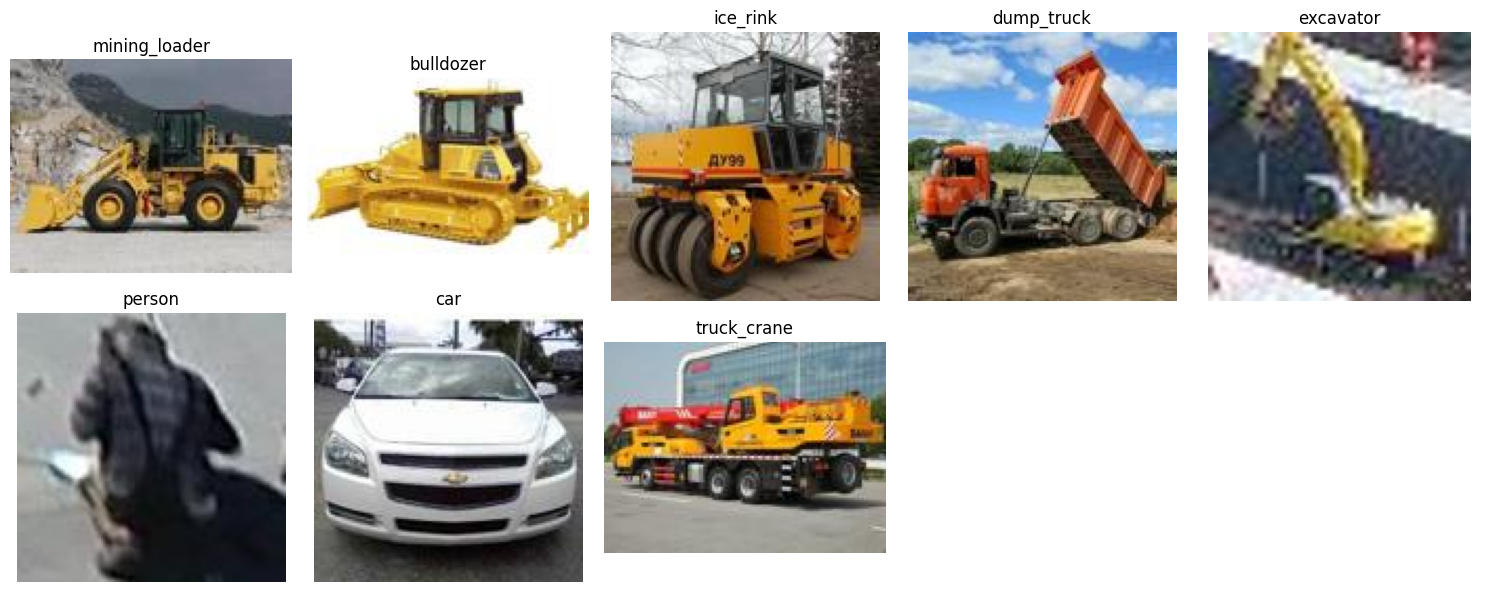

🎲 Показано по 1 случайному изображению из 8 категорий


In [4]:
# Показано по 1 случайному изображению из каждой категорий
from PIL import Image
import os
import matplotlib.pyplot as plt
import random

# Создаем график 2x5
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

categories = os.listdir(IMAGE_PATH)
plot_index = 0

for category in categories:
    category_path = os.path.join(IMAGE_PATH, category)
    file_names = os.listdir(category_path)
    
    # Берем 1 случайное изображение из каждой категории
    if file_names:
        random_file = random.choice(file_names)
        img_path = os.path.join(category_path, random_file)
        img = Image.open(img_path)
        
        axes[plot_index].imshow(img)
        axes[plot_index].set_title(f"{category}", fontsize=12)
        axes[plot_index].axis('off')
        plot_index += 1

# Скрываем лишние subplot'ы
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"🎲 Показано по 1 случайному изображению из {plot_index} категорий")

📊 АНАЛИЗ ДАТАСЕТА:
  bulldozer: 194 файлов
  car: 1586 файлов
  dump_truck: 797 файлов
  excavator: 316 файлов
  ice_rink: 293 файлов
  mining_loader: 514 файлов
  person: 969 файлов
  truck_crane: 321 файлов
📈 ИТОГО: 4990 изображений, 8 классов


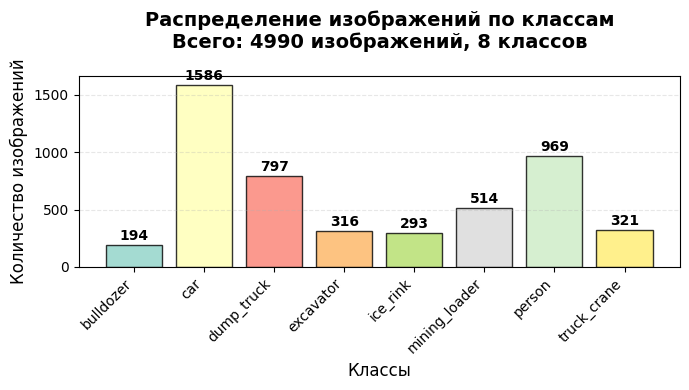

In [7]:
# Простой анализ датасета с визуализацией

import os
import matplotlib.pyplot as plt
import numpy as np

def analyze_dataset_simple(dataset_path):
    """
    Простой анализ датасета с визуализацией
    """
    # Проверяем существование пути
    if not os.path.exists(dataset_path):
        print(f"❌ Ошибка: путь '{dataset_path}' не существует")
        return None
    
    # Получаем список классов
    class_names = [d for d in os.listdir(dataset_path) 
                  if os.path.isdir(os.path.join(dataset_path, d))]
    class_names.sort()
    
    if not class_names:
        print("❌ В датасете не найдено папок с классами")
        return None
    
    # Подсчет файлов
    class_counts = {}
    total_files = 0
    
    print("📊 АНАЛИЗ ДАТАСЕТА:")
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        count = len(image_files)
        class_counts[class_name] = count
        total_files += count
        print(f"  {class_name}: {count} файлов")
    
    print(f"📈 ИТОГО: {total_files} изображений, {len(class_names)} классов")
    
    # Визуализация
    plt.figure(figsize=(7, 4))
    
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    # Создаем диаграмму
    bars = plt.bar(classes, counts, color=plt.cm.Set3(np.linspace(0, 1, len(classes))), 
                   edgecolor='black', alpha=0.8)
    
    # Настройки графика
    plt.title(f'Распределение изображений по классам\nВсего: {total_files} изображений, {len(class_names)} классов', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Классы', fontsize=12)
    plt.ylabel('Количество изображений', fontsize=12)
    
    # Поворачиваем подписи и выравниваем
    plt.xticks(rotation=45, ha='right')
    
    # Добавляем значения на столбцы
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Добавляем сетку для удобства чтения
    plt.grid(True, axis='y', alpha=0.3, linestyle='--')
    
    # Настраиваем отступы
    plt.tight_layout()
    
    plt.show()
    
    return {'class_names': class_names, 'class_counts': class_counts, 'total_files': total_files}

# ИСПОЛЬЗОВАНИЕ:
# Просто вызовите функцию с путем к вашему датасету
result = analyze_dataset_simple(IMAGE_PATH)

In [5]:
height, width = 224, 224
batch_size=16

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    IMAGE_PATH,
    subset="training",
    validation_split=0.2,
    seed=42,
    label_mode='categorical',
    image_size=(height, width),  # Уменьшенный размер изображений
    batch_size=batch_size,  # Уменьшенный размер батча
    shuffle=True  # Перемешивание данных
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    IMAGE_PATH,
    subset="validation",
    validation_split=0.2,
    seed=42,
    label_mode='categorical',
    image_size=(height, width),  # Уменьшенный размер изображений
    batch_size=batch_size,  # Уменьшенный размер батча
    #shuffle=False
    shuffle=True  # Перемешивание данных
)

# Проверка количества изображений в каждой поддиректории
class_counts = {}
for class_name in os.listdir(IMAGE_PATH):
    class_path = os.path.join(IMAGE_PATH, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])


print("Class counts:", class_counts)

# Оптимизация потока данных
#train_data = train_data.cache().prefetch(buffer_size=1)
#validation_data = validation_data.cache().prefetch(buffer_size=1)
#train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
#validation_data = validation_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
# train_data = train_data.cache().prefetch(buffer_size=1)
# validation_data = validation_data.cache().prefetch(buffer_size=1)
# Это дает БОЛЬШЕ ускорения чем настройки TensorFlow!
#train_data = train_data.batch(32).prefetch(tf.data.AUTOTUNE).cache()
#validation_data = validation_data.batch(32).prefetch(tf.data.AUTOTUNE)
#------------------------------------------------------------------------------------------------------
# ✅ ДЛЯ ОБУЧАЮЩИХ ДАННЫХ (с аугментацией):
#train_data = train_data.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)
# ✅ ДЛЯ ВАЛИДАЦИОННЫХ ДАННЫХ (без аугментации):
#validation_data = validation_data.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)
# 2. ✅ ПРАВИЛЬНАЯ оптимизация - БЕЗ повторного .batch()!

train_data = train_data.cache().prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.cache().prefetch(tf.data.AUTOTUNE)
print(f"✅ Оптимизированный pipeline:")
print(f"   Train: {len(list(train_data))} батчей")
print(f"   Validation: {len(list(validation_data))} батчей")
#------------------------------------------------------------------------------------------------------

# Проверка формата меток на обучающих данных
for images, labels in train_data.take(1):
    print("Формат меток (train):", labels.shape, labels.dtype)
    print("Пример меток (train):", labels.numpy())
#Тема #17. Классификация изображений на AutoKeras


# Проверка формата меток на валидационных данных
for images, labels in validation_data.take(1):
    print("Формат меток (validation):", labels.shape, labels.dtype)
    print("Пример меток (validation):", labels.numpy())

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
#print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Found 4990 files belonging to 8 classes.
Using 3992 files for training.


I0000 00:00:1761105140.731360     496 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9558 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 4990 files belonging to 8 classes.
Using 998 files for validation.
Class counts: {'mining_loader': 514, 'bulldozer': 194, 'ice_rink': 293, 'dump_truck': 797, 'excavator': 316, 'person': 969, 'car': 1586, 'truck_crane': 321}
✅ Оптимизированный pipeline:
   Train: 250 батчей
   Validation: 63 батчей
Формат меток (train): (16, 8) <dtype: 'float32'>
Пример меток (train): [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
Формат меток (validation): (16, 8) <dtype: 'float32'>
Пример меток (validation): [[0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [

2025-10-22 06:52:24.771551: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-22 06:52:24.839789: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-22 06:52:24.859854: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
# Посмотреть размер одного батча
for images, labels in train_data.take(1):
    print("Форма одного батча:", images.shape)
    print("Размер одного батча в MiB:",
          tf.size(images).numpy() * 4 / (1024 ** 2), "MiB")

Форма одного батча: (16, 224, 224, 3)
Размер одного батча в MiB: 9.1875 MiB


In [6]:
# Добавьте для диагностики
import time

print("🧪 ТЕСТ ПРОИЗВОДИТЕЛЬНОСТИ...")
start_time = time.time()

# Тест скорости одного батча
for i, (images, labels) in enumerate(train_data.take(10)):
    if i == 0:
        batch_time = time.time() - start_time
        print(f"⏱️ Первый батч: {batch_time:.2f} сек")
    
print(f"⏱️ 10 батчей: {time.time() - start_time:.2f} сек")

# Идеальные показатели:
# - Первый батч: 0.5-2 сек (из-за кэширования)
# - Последующие: 0.1-0.5 сек на батч

🧪 ТЕСТ ПРОИЗВОДИТЕЛЬНОСТИ...
⏱️ Первый батч: 0.01 сек
⏱️ 10 батчей: 0.01 сек


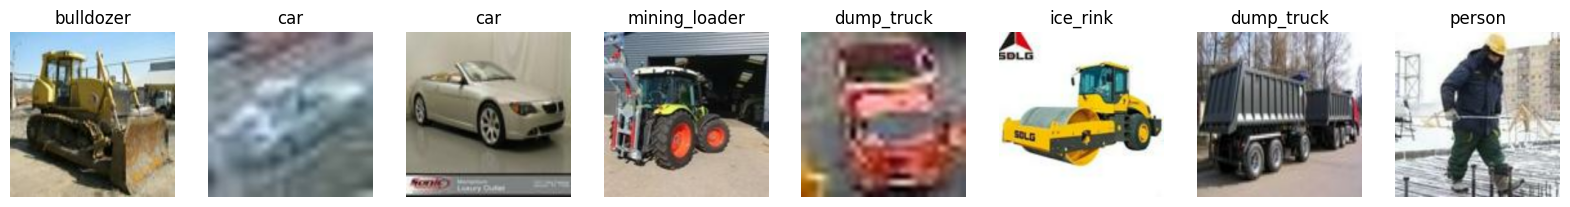

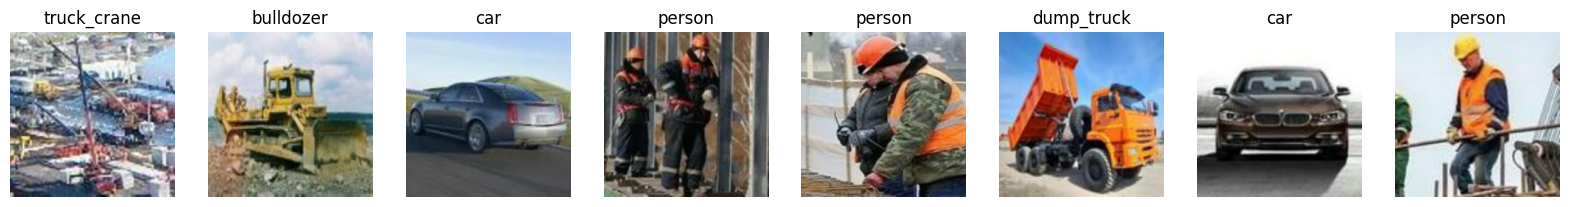

In [18]:
import matplotlib.pyplot as plt
import numpy as np
# Функция для визуализации изображений
def visualize_images(dataset, class_list, num_images=8):
    images, labels = next(iter(dataset))
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].numpy().astype('uint8'))
        ax.set_title(class_list[np.argmax(labels[i].numpy())])
        ax.axis('off')
    plt.show()

# Визуализация изображений из обучающей выборки
visualize_images(train_data, CLASS_LIST)

# Визуализация изображений из валидационной выборки
visualize_images(validation_data, CLASS_LIST)

In [20]:
# ДОБАВЬТЕ ЭТО ДЛЯ ДИАГНОСТИКИ
print("🔍 ДИАГНОСТИКА AUTOKERAS...")
print(f"Количество батчей в train_data: {len(list(train_data))}")
print(f"Количество батчей в validation_data: {len(list(validation_data))}")

# Проверим, что данные загружаются
sample_batch = next(iter(train_data))
print(f"Размер батча: {sample_batch[0].shape}")
print(f"Размер меток: {sample_batch[1].shape}")

🔍 ДИАГНОСТИКА AUTOKERAS...
Количество батчей в train_data: 250
Количество батчей в validation_data: 63
Размер батча: (16, 224, 224, 3)
Размер меток: (16, 8)


In [7]:
# Conv + Dense + ClassificationHead
import gc
import os
import autokeras as ak
from tensorflow.keras import layers
import tensorflow as tf
import warnings
import time

# Настройки
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit_disabled'
#gc.collect()

# Подавление предупреждений
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings("ignore")


# Создаем входной узел для изображений
input_node = ak.ImageInput()

# Добавляем слой нормализации к входному узлу
#output_node = ak.Normalization()(input_node)

# Добавляем сверточный блок с двумя слоями и 128 фильтрами, Сверточный слой, (Многоуровневое) извлечение признаков
output_node = ak.ConvBlock(num_layers=2, filters=128)(input_node)

# Полносвязный слой
output_node = ak.DenseBlock(num_layers=1, num_units=64)(output_node) #

# Добавляем слой классификатора
output_node = ak.ClassificationHead()(output_node)

# Создаем экземпляр AutoModel с нашими кастомными входами и выходами
model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    tune_new_entries=True,  # может ДОБАВЛЯТЬ новые слои поверх указанных
    directory='automodel_experiment_2',
    objective='val_accuracy',
    seed = 4849,
    overwrite=True,                         # Перезаписать предыдущие результаты при повторном запуске
    max_trials=10                            # Максимальное количество попыток для каждой модели
)

# # Callbacks
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, verbose=1),
#     tf.keras.callbacks.ModelCheckpoint('best_model_autokeras.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
#     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1),
# ]

print("🚀 Запуск обучения AutoModel для 8 классов...")

start_time = time.time()
# Обучение с большим количеством эпох
history = model.fit(
    train_data,
    epochs=20,                 # ✓ Больше эпох для сходимости
    validation_data=validation_data,
    #callbacks=callbacks,
    verbose=1
)
end_time = time.time()
print(f"⏰ Время обучения: {(end_time - start_time)/60:.2f} минут")

Trial 10 Complete [00h 04m 14s]
val_accuracy: 0.7685370445251465

Best val_accuracy So Far: 0.7685370445251465
Total elapsed time: 00h 40m 05s
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.3550 - loss: 1.7642 - val_accuracy: 0.3487 - val_loss: 1.6485
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.4820 - loss: 1.4559 - val_accuracy: 0.5521 - val_loss: 1.2461
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.5669 - loss: 1.2317 - val_accuracy: 0.5972 - val_loss: 1.2622
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.5989 - loss: 1.1424 - val_accuracy: 0.6673 - val_loss: 1.0582
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.6115 - loss: 1.0837 - val_accuracy: 0.6553 - val_loss: 1.1083
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.6393 - loss: 1.0142 - val_accuracy: 0.6834 - val_loss: 0.9933
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.6636 - lo

In [ ]:
# без верхней оптимизации: 49.50 минут
# c верхней оптимизацией: 50.90 минут
# c float 32: 44.73 минут

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7685 - loss: 0.7950
Loss: 0.7950282692909241
Accuracy: 0.7685370445251465


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 222, 222, 128)  │           539 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 220, 220, 128)  │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 108, 108, 128)  │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 106, 106, 128)  │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 359552)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    23,011,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head_1 (Softmax) │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,065,443 (87.99 MB)

 Trainable params: 23,065,443 (87.99 MB)

 Non-trainable params: 0 (0.00 B)

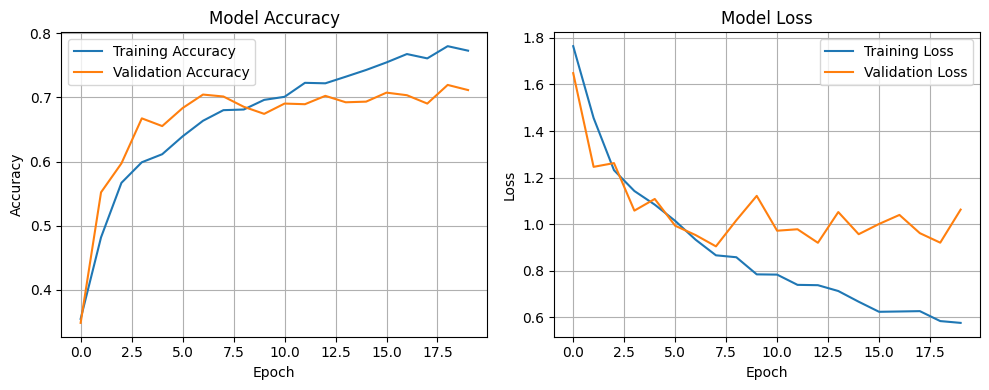

In [8]:
# Для меток ONE-HOT

# метки ONE-HOT

# Для AutoModel - получаем лучшую модель
best_model_1 = model.export_model()  # ← ИЗМЕНИЛОСЬ: model.export_model() 

# проверяем модель на тестовой выборке
loss, accuracy = best_model_1.evaluate(validation_data, batch_size=32, verbose=1)

# Выводим результаты оценки модели
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

best_model_1.summary()

import matplotlib.pyplot as plt

# Функция для построения графиков
def plot_training_history(history):
    """Функция для построения графиков обучения"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # График точности
    if 'accuracy' in history.history:
        ax1.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # График потерь
    if 'loss' in history.history:
        ax2.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Вызов функции
plot_training_history(history)

In [14]:
import gc
import os
import autokeras as ak
from tensorflow.keras import layers
import tensorflow as tf
import warnings

# Настройки
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit_disabled'
gc.collect()

# Подавление предупреждений
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings("ignore")

# Создание модели
input_node = ak.ImageInput()

# Расширенная аугментация
augmented = ak.ImageAugmentation(
    horizontal_flip=True,
    rotation_factor=0.1,
    zoom_factor=0.1,
    contrast_factor=0.1
)(input_node)

# Нормализация
normalized = ak.Normalization()(augmented)

# ResNet-like архитектура
features = ak.ResNetBlock(version='v2')(normalized)

# Глобальный пуллинг
pooled = layers.GlobalAveragePooling2D()(features)

# Dense блок перед классификацией
dense = ak.DenseBlock(num_layers=1, dropout=0.3)(pooled)

# Выход
output = ak.ClassificationHead(num_classes=8)(dense)

# Создание AutoModel
model = ak.AutoModel(
    inputs=input_node,
    outputs=output,
    max_trials=15,
    overwrite=True,
    directory='advanced_model'
)

# # Callbacks
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, verbose=1),
#     tf.keras.callbacks.ModelCheckpoint('best_model_autokeras.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
#     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1),
# ]

print("🚀 Запуск обучения AutoKeras...")

# Обучение
history = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data,
    callbacks=callbacks,
    verbose=1
)

# Сохранение финальной модели
best_model = model.export_model()
best_model.save('final_autokeras_model.keras')
print("💾 Финальная модель сохранена!")

# Сборка мусора
gc.collect()

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: <autokeras.engine.node.Node object at 0x7b47ec313f70> (of type <class 'autokeras.engine.node.Node'>)

In [ ]:
import gc
import os
import autokeras as ak
from tensorflow.keras import layers
import tensorflow as tf
import warnings

# Настройки
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit_disabled'
gc.collect()

# Подавление предупреждений
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
warnings.filterwarnings("ignore")

# Создаем входной узел для изображений
input_node = ak.ImageInput()

# Применяем нормализацию к входному узлу
output_node = ak.Normalization()(input_node)

# Добавляем блок с предобученной моделью, например, ResNet
# Здесь вы можете выбрать версию ResNet и указать, использовать ли предобученные веса
output_node = ak.ResNetBlock(version='v1', pretrained=True)(output_node)

# Добавляем сверточный блок для дополнительного извлечения признаков
output_node = ak.ConvBlock(
    num_layers=2,  # количество слоев в блоке
    filters=64,  # количество фильтров в каждом слое
    kernel_size=2,  # размер ядра для свертки
    max_pooling=True,  # использование MaxPooling
    dropout=0.3  # dropout для регуляризации
)(output_node)

# Добавляем слой для классификации
output_node = ak.ClassificationHead(
    num_classes=8,  # ⭐ ВАЖНО: указываем количество классов
    dropout=0.5  # dropout в классификационном слое
)(output_node)




# Создание AutoModel
model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    objective='val_accuracy',
    overwrite=True,
    directory='advanced_model',
    max_trials=10,  #  количество попыток для поиска лучшей модели
    tuner='bayesian'  # Используем Bayesian Optimization для подбора параметров
)

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('keras_automodel__.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1),
]

print("🚀 Запуск обучения AutoKeras...")

# Обучение
history = model.fit(
    train_data,
    epochs=30,
    validation_data=validation_data,
    callbacks=callbacks,
    verbose=1
)

# Сохранение финальной модели
best_model = model.export_model()
best_model.save('keras_automodel_.keras')
print("💾 Финальная модель сохранена!")

# Сборка мусора
gc.collect()

Trial 1 Complete [00h 04m 48s]
val_accuracy: 0.29659318923950195

Best val_accuracy So Far: 0.29659318923950195
Total elapsed time: 00h 04m 48s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
True              |True              |res_net_block_1/trainable
resnet50          |resnet101         |res_net_block_1/version
True              |False             |res_net_block_1/imagenet_size
True              |True              |conv_block_1/separable
2                 |3                 |conv_block_1/num_blocks
global_avg        |global_avg        |classification_head_1/spatial_reduction_1/reduction_type
adam_weight_decay |adam              |optimizer
0.1               |1e-05             |learning_rate

Epoch 1/30


In [14]:
# Как посмотреть все испытанные модели:

import autokeras as ak
import tensorflow as tf

# Обучаем как обычно
#clf = ak.ImageClassifier(max_trials=5, directory='test_1', overwrite=True)
#history = clf.fit(train_data, epochs=10, validation_data=validation_data)

# 🔍 ПОСМОТРЕТЬ ВСЕ TRIALS
print("📊 Все испытания (trials):")
for i, trial in enumerate(clf.tuner.oracle.get_best_trials(5)):
    print(f"\nTrial {i+1}:")
    print(f"  Score: {trial.score:.4f}")
    print(f"  Status: {trial.status}")
    print(f"  Hyperparameters: {trial.hyperparameters.values}")

# 🏆 ЛУЧШАЯ МОДЕЛЬ
best_trial = clf.tuner.oracle.get_best_trials(1)[0]
print(f"\n🎯 Лучший trial:")
print(f"  Score: {best_trial.score:.4f}")
print(f"  Hyperparameters: {best_trial.hyperparameters.values}")

📊 Все испытания (trials):

Trial 1:
  Score: 0.9529
  Status: COMPLETED
  Hyperparameters: {'image_block_1/normalize': True, 'image_block_1/augment': False, 'image_block_1/block_type': 'resnet', 'image_block_1/res_net_block_1/pretrained': True, 'image_block_1/res_net_block_1/version': 'resnet101_v2', 'image_block_1/res_net_block_1/imagenet_size': True, 'classification_head_1/spatial_reduction_1/reduction_type': 'global_avg', 'classification_head_1/dropout': 0.0, 'optimizer': 'sgd', 'learning_rate': 0.001, 'image_block_1/res_net_block_1/trainable': True}

Trial 2:
  Score: 0.8788
  Status: COMPLETED
  Hyperparameters: {'image_block_1/normalize': True, 'image_block_1/augment': False, 'image_block_1/block_type': 'xception', 'classification_head_1/spatial_reduction_1/reduction_type': 'global_max', 'classification_head_1/dropout': 0.25, 'optimizer': 'adam_weight_decay', 'learning_rate': 0.0001, 'image_block_1/xception_block_1/pretrained': False, 'image_block_1/xception_block_1/imagenet_size

In [15]:


best_model = clf.export_model()
#best_model.save('ImClass_best_model_.keras')
best_model.summary()

# проверяем модель на тестовой выборке
loss, accuracy = best_model.evaluate(validation_data, batch_size=32, verbose=1)

# Выводим результаты оценки модели
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Создаем имя файла с динамической вставкой точности
file_name = f"keras_autokeras_{accuracy:.4f}.keras"
# Сохраняем модель
best_model.save(file_name)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 224, 224, 3)    │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet101v2 (Functional)        │ (None, 7, 7, 2048)     │    42,626,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        16,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head_1 (Softmax) │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,642,959 (162.67 MB)

 Trainable params: 42,545,288 (162.30 MB)

 Non-trainable params: 97,671 (381.53 KB)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9529 - loss: 0.1787
Loss: 0.17872227728366852
Accuracy: 0.9529058337211609


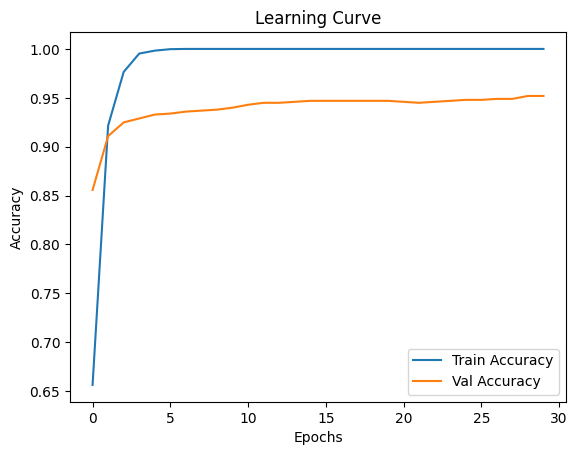

In [16]:
# График обучения
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step


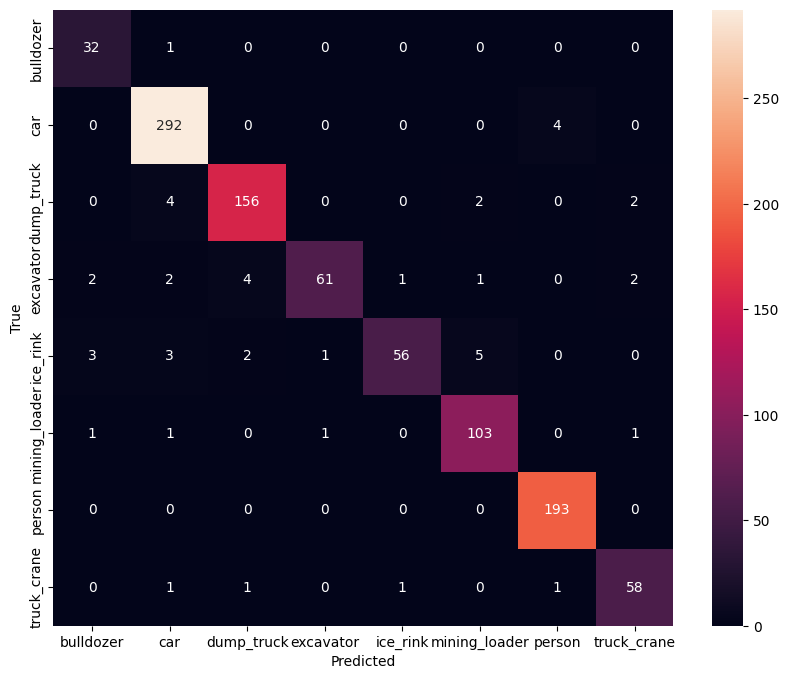

In [17]:
# Визуализация матрицы
import numpy as np

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = np.concatenate([y for x, y in validation_data], axis=0).argmax(axis=1)
y_pred = clf.export_model().predict(validation_data).argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=CLASS_LIST, yticklabels=CLASS_LIST)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

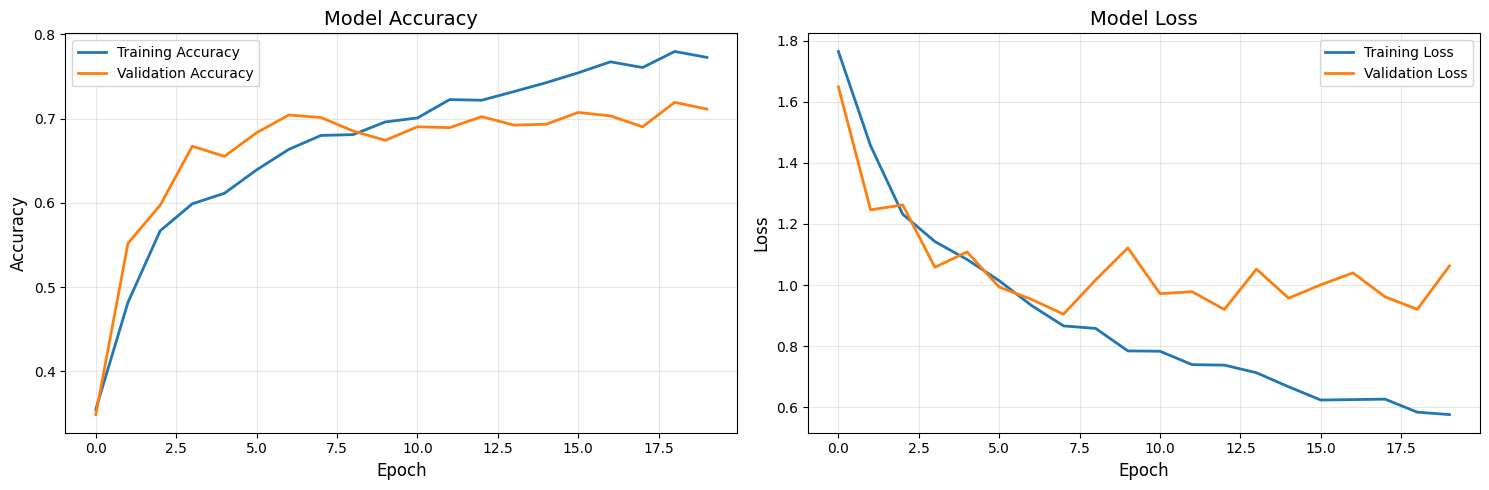

In [20]:
# Визуализация результатов

import matplotlib.pyplot as plt
import numpy as np

#history = final_history

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # График точности
    ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    ax1.set_title('Model Accuracy', fontsize=14)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # График потерь
    ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
    ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax2.set_title('Model Loss', fontsize=14)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Построим графики
plot_training_history(history)

🚀 ЗАПУСК CONFUSION MATRIX АНАЛИЗА...
📊 ЗАПУСКАЕМ CONFUSION MATRIX АНАЛИЗ...
🔄 Получаем предсказания...
🔄 Собираем предсказания и метки...
📦 Обработано батчей: 10
📦 Обработано батчей: 20
📦 Обработано батчей: 30
📦 Обработано батчей: 40
📦 Обработано батчей: 50
📦 Обработано батчей: 60
✅ Собрано 998 предсказаний
🔢 Уникальные истинные классы: [0 1 2 3 4 5 6 7]
🔢 Уникальные предсказанные классы: [0 1 2 3 4 5 6 7]
📋 Присутствующие классы: ['bulldozer', 'car', 'dump_truck', 'excavator', 'ice_rink', 'mining_loader', 'person', 'truck_crane']
📏 Confusion matrix shape: (8, 8)


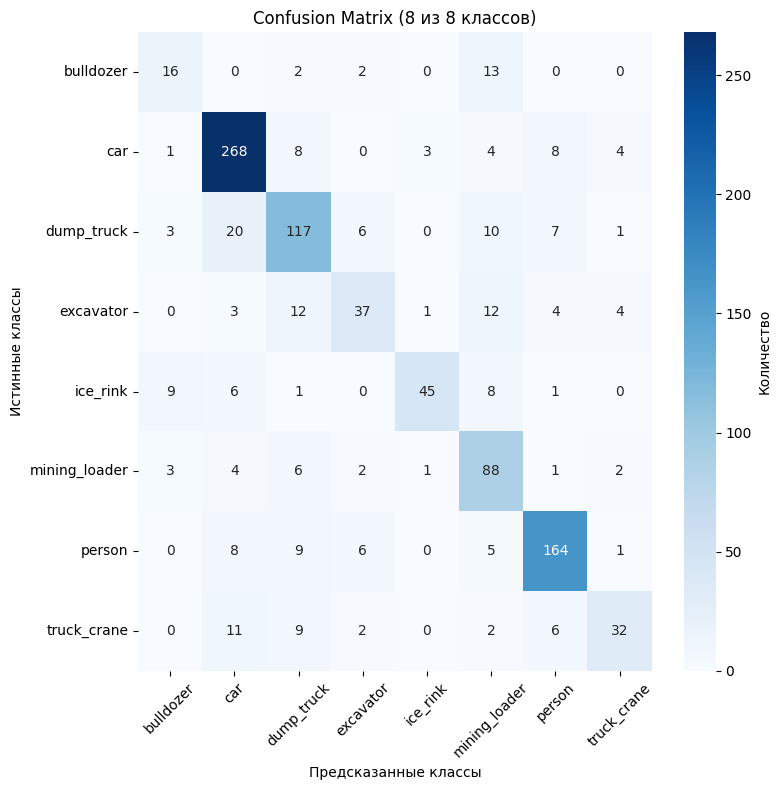


📈 ДЕТАЛЬНАЯ СТАТИСТИКА:
Всего примеров: 998
Общая точность: 0.7685

🎯 ТОЧНОСТЬ ПО КЛАССАМ:
  bulldozer: 0.4848 (16/33)
  car: 0.9054 (268/296)
  dump_truck: 0.7134 (117/164)
  excavator: 0.5068 (37/73)
  ice_rink: 0.6429 (45/70)
  mining_loader: 0.8224 (88/107)
  person: 0.8497 (164/193)
  truck_crane: 0.5161 (32/62)

📊 CLASSIFICATION REPORT:
               precision    recall  f1-score   support

    bulldozer     0.5000    0.4848    0.4923        33
          car     0.8375    0.9054    0.8701       296
   dump_truck     0.7134    0.7134    0.7134       164
    excavator     0.6727    0.5068    0.5781        73
     ice_rink     0.9000    0.6429    0.7500        70
mining_loader     0.6197    0.8224    0.7068       107
       person     0.8586    0.8497    0.8542       193
  truck_crane     0.7273    0.5161    0.6038        62

     accuracy                         0.7685       998
    macro avg     0.7287    0.6802    0.6961       998
 weighted avg     0.7722    0.7685    0.7650   

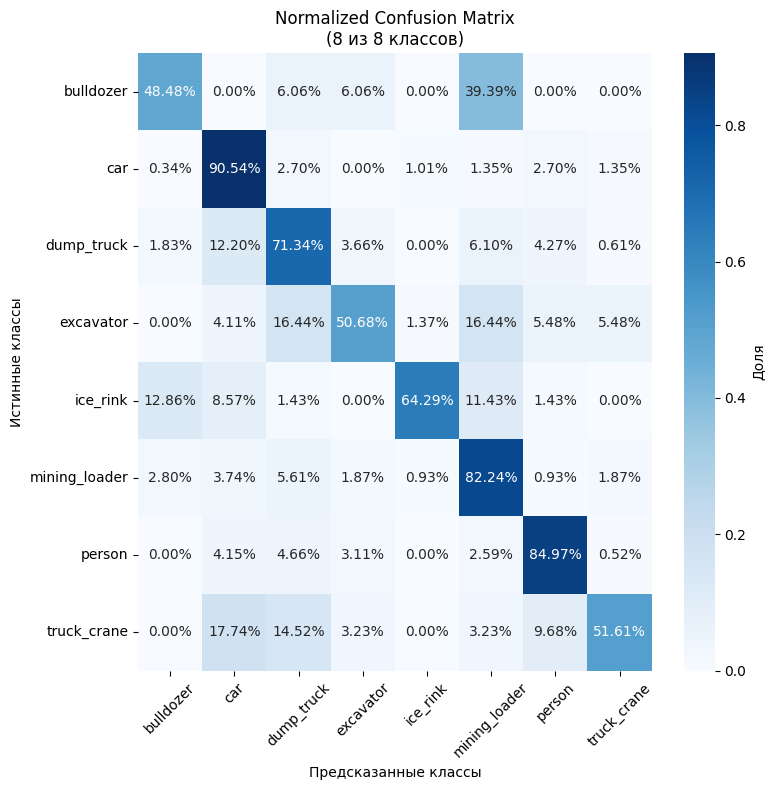

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

#history = final_history

'''
Синие тона:
cmap='Blues' # твой текущий
cmap='viridis' 
cmap='coolwarm'
cmap='icefire'

Зеленые тона:
cmap='Greens'
cmap='viridis'
cmap='summer'

Красные/оранжевые:
cmap='Reds'
cmap='Oranges'
cmap='YlOrBr'  
cmap='hot'

Фиолетовые:
cmap='Purples'
cmap='magma'
cmap='plasma'
'''


def get_all_predictions_modern(model, dataset):
    """Получает все предсказания и метки из датасета"""
    print("🔄 Собираем предсказания и метки...")
    
    all_preds = []
    all_true_labels = []
    
    # Проходим по всем батчам датасета
    for batch_idx, (images, labels) in enumerate(dataset):
        # Получаем предсказания для текущего батча
        batch_preds = model.predict(images, verbose=0)
        all_preds.append(batch_preds)
        all_true_labels.append(labels.numpy())
        
        # Прогресс каждые 10 батчей
        if (batch_idx + 1) % 10 == 0:
            print(f"📦 Обработано батчей: {batch_idx + 1}")
    
    # Объединяем все батчи
    all_preds = np.concatenate(all_preds, axis=0)
    all_true_labels = np.concatenate(all_true_labels, axis=0)
    
    print(f"✅ Собрано {len(all_preds)} предсказаний")
    return all_preds, all_true_labels

def safe_confusion_matrix_analysis(model, dataset, class_names):
    """Безопасный анализ confusion matrix с автоматической обработкой отсутствующих классов"""
    print("📊 ЗАПУСКАЕМ CONFUSION MATRIX АНАЛИЗ...")
    
    # Получаем предсказания
    print("🔄 Получаем предсказания...")
    preds, true_labels = get_all_predictions_modern(model, dataset)
    
    # Для sparse categorical - метки уже целые числа, не нужно argmax
    if len(true_labels.shape) == 1:  # sparse labels [0, 1, 2, ...]
        true_classes = true_labels
    else:  # one-hot encoded labels
        true_classes = np.argmax(true_labels, axis=1)
    
    preds_classes = np.argmax(preds, axis=1)
    
    # Находим какие классы реально присутствуют в данных
    present_true_classes = np.unique(true_classes)
    present_pred_classes = np.unique(preds_classes)
    
    print(f"🔢 Уникальные истинные классы: {present_true_classes}")
    print(f"🔢 Уникальные предсказанные классы: {present_pred_classes}")
    
    # Определяем какие классы из class_names реально присутствуют
    present_class_indices = sorted(present_true_classes)
    present_class_names = [class_names[i] for i in present_class_indices]
    
    print(f"📋 Присутствующие классы: {present_class_names}")
    
    absent_classes = [class_names[i] for i in range(len(class_names)) if i not in present_true_classes]
    if absent_classes:
        print(f"❌ Отсутствующие классы: {absent_classes}")
    
    # Создаем confusion matrix только для присутствующих классов
    cm = confusion_matrix(true_classes, preds_classes, labels=present_class_indices)
    
    print(f"📏 Confusion matrix shape: {cm.shape}")
    
    # Визуализируем
    plt.figure(figsize=(max(8, len(present_class_names)), max(6, len(present_class_names))))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=present_class_names, 
                yticklabels=present_class_names,
                cbar_kws={'label': 'Количество'})
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.title(f'Confusion Matrix ({len(present_class_names)} из {len(class_names)} классов)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Статистика
    total_samples = len(true_classes)
    accuracy = np.sum(preds_classes == true_classes) / total_samples
    
    print(f"\n📈 ДЕТАЛЬНАЯ СТАТИСТИКА:")
    print(f"Всего примеров: {total_samples}")
    print(f"Общая точность: {accuracy:.4f}")
    
    print(f"\n🎯 ТОЧНОСТЬ ПО КЛАССАМ:")
    for i, class_idx in enumerate(present_class_indices):
        class_name = class_names[class_idx]
        correct = cm[i, i]
        total = np.sum(cm[i, :])
        accuracy = correct / total if total > 0 else 0
        print(f"  {class_name}: {accuracy:.4f} ({correct}/{total})")
    
    # Для отсутствующих классов
    if absent_classes:
        print(f"\n❌ ОТСУТСТВУЮЩИЕ КЛАССЫ В ВАЛИДАЦИИ:")
        for class_name in absent_classes:
            print(f"  {class_name}: 0 примеров")
    
    # Classification report только для присутствующих классов
    print(f"\n📊 CLASSIFICATION REPORT:")
    print(classification_report(true_classes, preds_classes, 
                              labels=present_class_indices,
                              target_names=present_class_names, 
                              digits=4))
    
    # Нормализованная confusion matrix
    plt.figure(figsize=(max(8, len(present_class_names)), max(6, len(present_class_names))))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)  # Заменяем NaN на 0
    
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=present_class_names, 
                yticklabels=present_class_names,
                cbar_kws={'label': 'Доля'})
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.title(f'Normalized Confusion Matrix\n({len(present_class_names)} из {len(class_names)} классов)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return cm, present_class_names

# 🎯 ЗАПУСКАЕМ АНАЛИЗ
print("🚀 ЗАПУСК CONFUSION MATRIX АНАЛИЗА...")
cm, present_classes = safe_confusion_matrix_analysis(best_model_1, validation_data, CLASS_LIST)

🎲 Тестирование случайных примеров...


2025-10-20 16:20:25.295473: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2959', 8 bytes spill stores, 8 bytes spill loads

2025-10-20 16:20:25.504755: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2959', 532 bytes spill stores, 532 bytes spill loads



TypeError: only integer scalar arrays can be converted to a scalar index

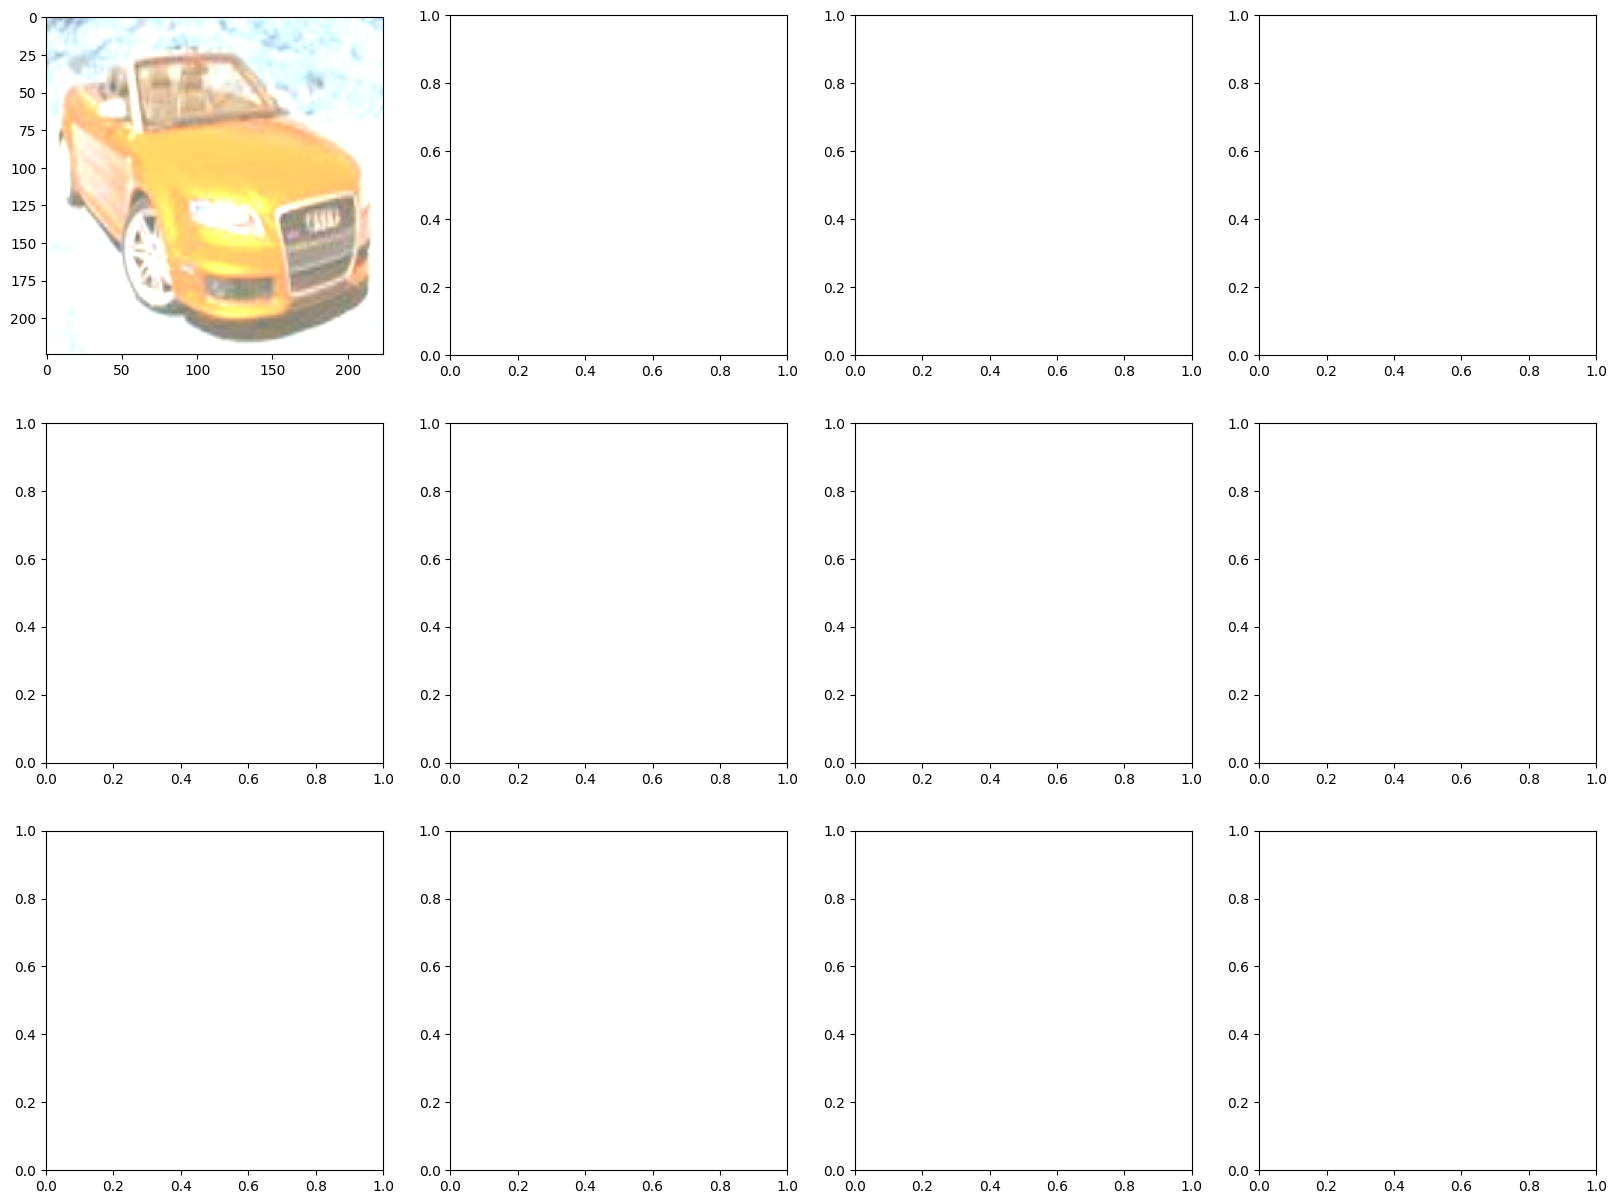

In [21]:
# рандом ВЕРСИЯ ДЛЯ SPARSE LABELS 

def test_random_predictions_modern(model, dataset, class_names, num_samples=12):
    """
    Тестирование случайных примеров из всего датасета
    ВЕРСИЯ ДЛЯ SPARSE LABELS (целочисленные метки)
    """
    # Собираем все изображения и метки
    all_images = []
    all_labels = []
    
    for images, labels in dataset:
        all_images.append(images.numpy())
        all_labels.append(labels.numpy())
    
    # Объединяем все батчи
    all_images = np.concatenate(all_images, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    # Выбираем случайные индексы
    total_samples = len(all_images)
    indices = np.random.choice(total_samples, min(num_samples, total_samples), replace=False)
    
    selected_images = all_images[indices]
    selected_labels = all_labels[indices]
    
    # Предсказания
    predictions = model.predict(selected_images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # ДЛЯ SPARSE LABELS - просто используем как есть, без argmax!
    true_classes = selected_labels  # ← ИСПРАВЛЕНИЕ ЗДЕСЬ
    
    # Создаем сетку
    cols = 4
    rows = (num_samples + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif rows > 1 and cols == 1:
        axes = axes.reshape(-1, 1)
    
    correct = 0
    for i, idx in enumerate(indices):
        if rows == 1:
            ax = axes[col] if cols > 1 else axes
        else:
            row_idx = i // cols
            col_idx = i % cols
            ax = axes[row_idx, col_idx]
        
        # Денормализация для ResNet50
        image = selected_images[i].copy()
        image[..., 0] += 103.939
        image[..., 1] += 116.779  
        image[..., 2] += 123.68
        image = np.clip(image, 0, 255).astype('uint8')
        image = image[..., ::-1]  # BGR to RGB
        
        ax.imshow(image)
        
        true_class = class_names[true_classes[i]]
        pred_class = class_names[predicted_classes[i]]
        confidence = np.max(predictions[i])
        
        color = 'green' if true_class == pred_class else 'red'
        if true_class == pred_class:
            correct += 1
            
        ax.set_title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}", 
                    color=color, fontsize=10)
        ax.axis('off')
    
    # Скрываем пустые оси
    for i in range(len(indices), rows * cols):
        if rows == 1:
            if cols > 1:
                axes[i].axis('off')
        else:
            row_idx = i // cols
            col_idx = i % cols
            axes[row_idx, col_idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    accuracy = correct / len(indices) * 100
    print(f"📊 Точность на {len(indices)} случайных примерах: {correct}/{len(indices)} ({accuracy:.1f}%)")
    
    return correct, accuracy

# Использование случайных примеров:
print("🎲 Тестирование случайных примеров...")
correct, accuracy = test_random_predictions_modern(best_model, validation_data, CLASS_LIST, num_samples=12)

🎲 Тестирование случайных примеров (универсальная версия)...


2025-10-20 16:21:05.003055: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2959', 580 bytes spill stores, 580 bytes spill loads

2025-10-20 16:21:05.043798: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2959', 716 bytes spill stores, 716 bytes spill loads



🔍 Обнаружен формат меток: ONE-HOT


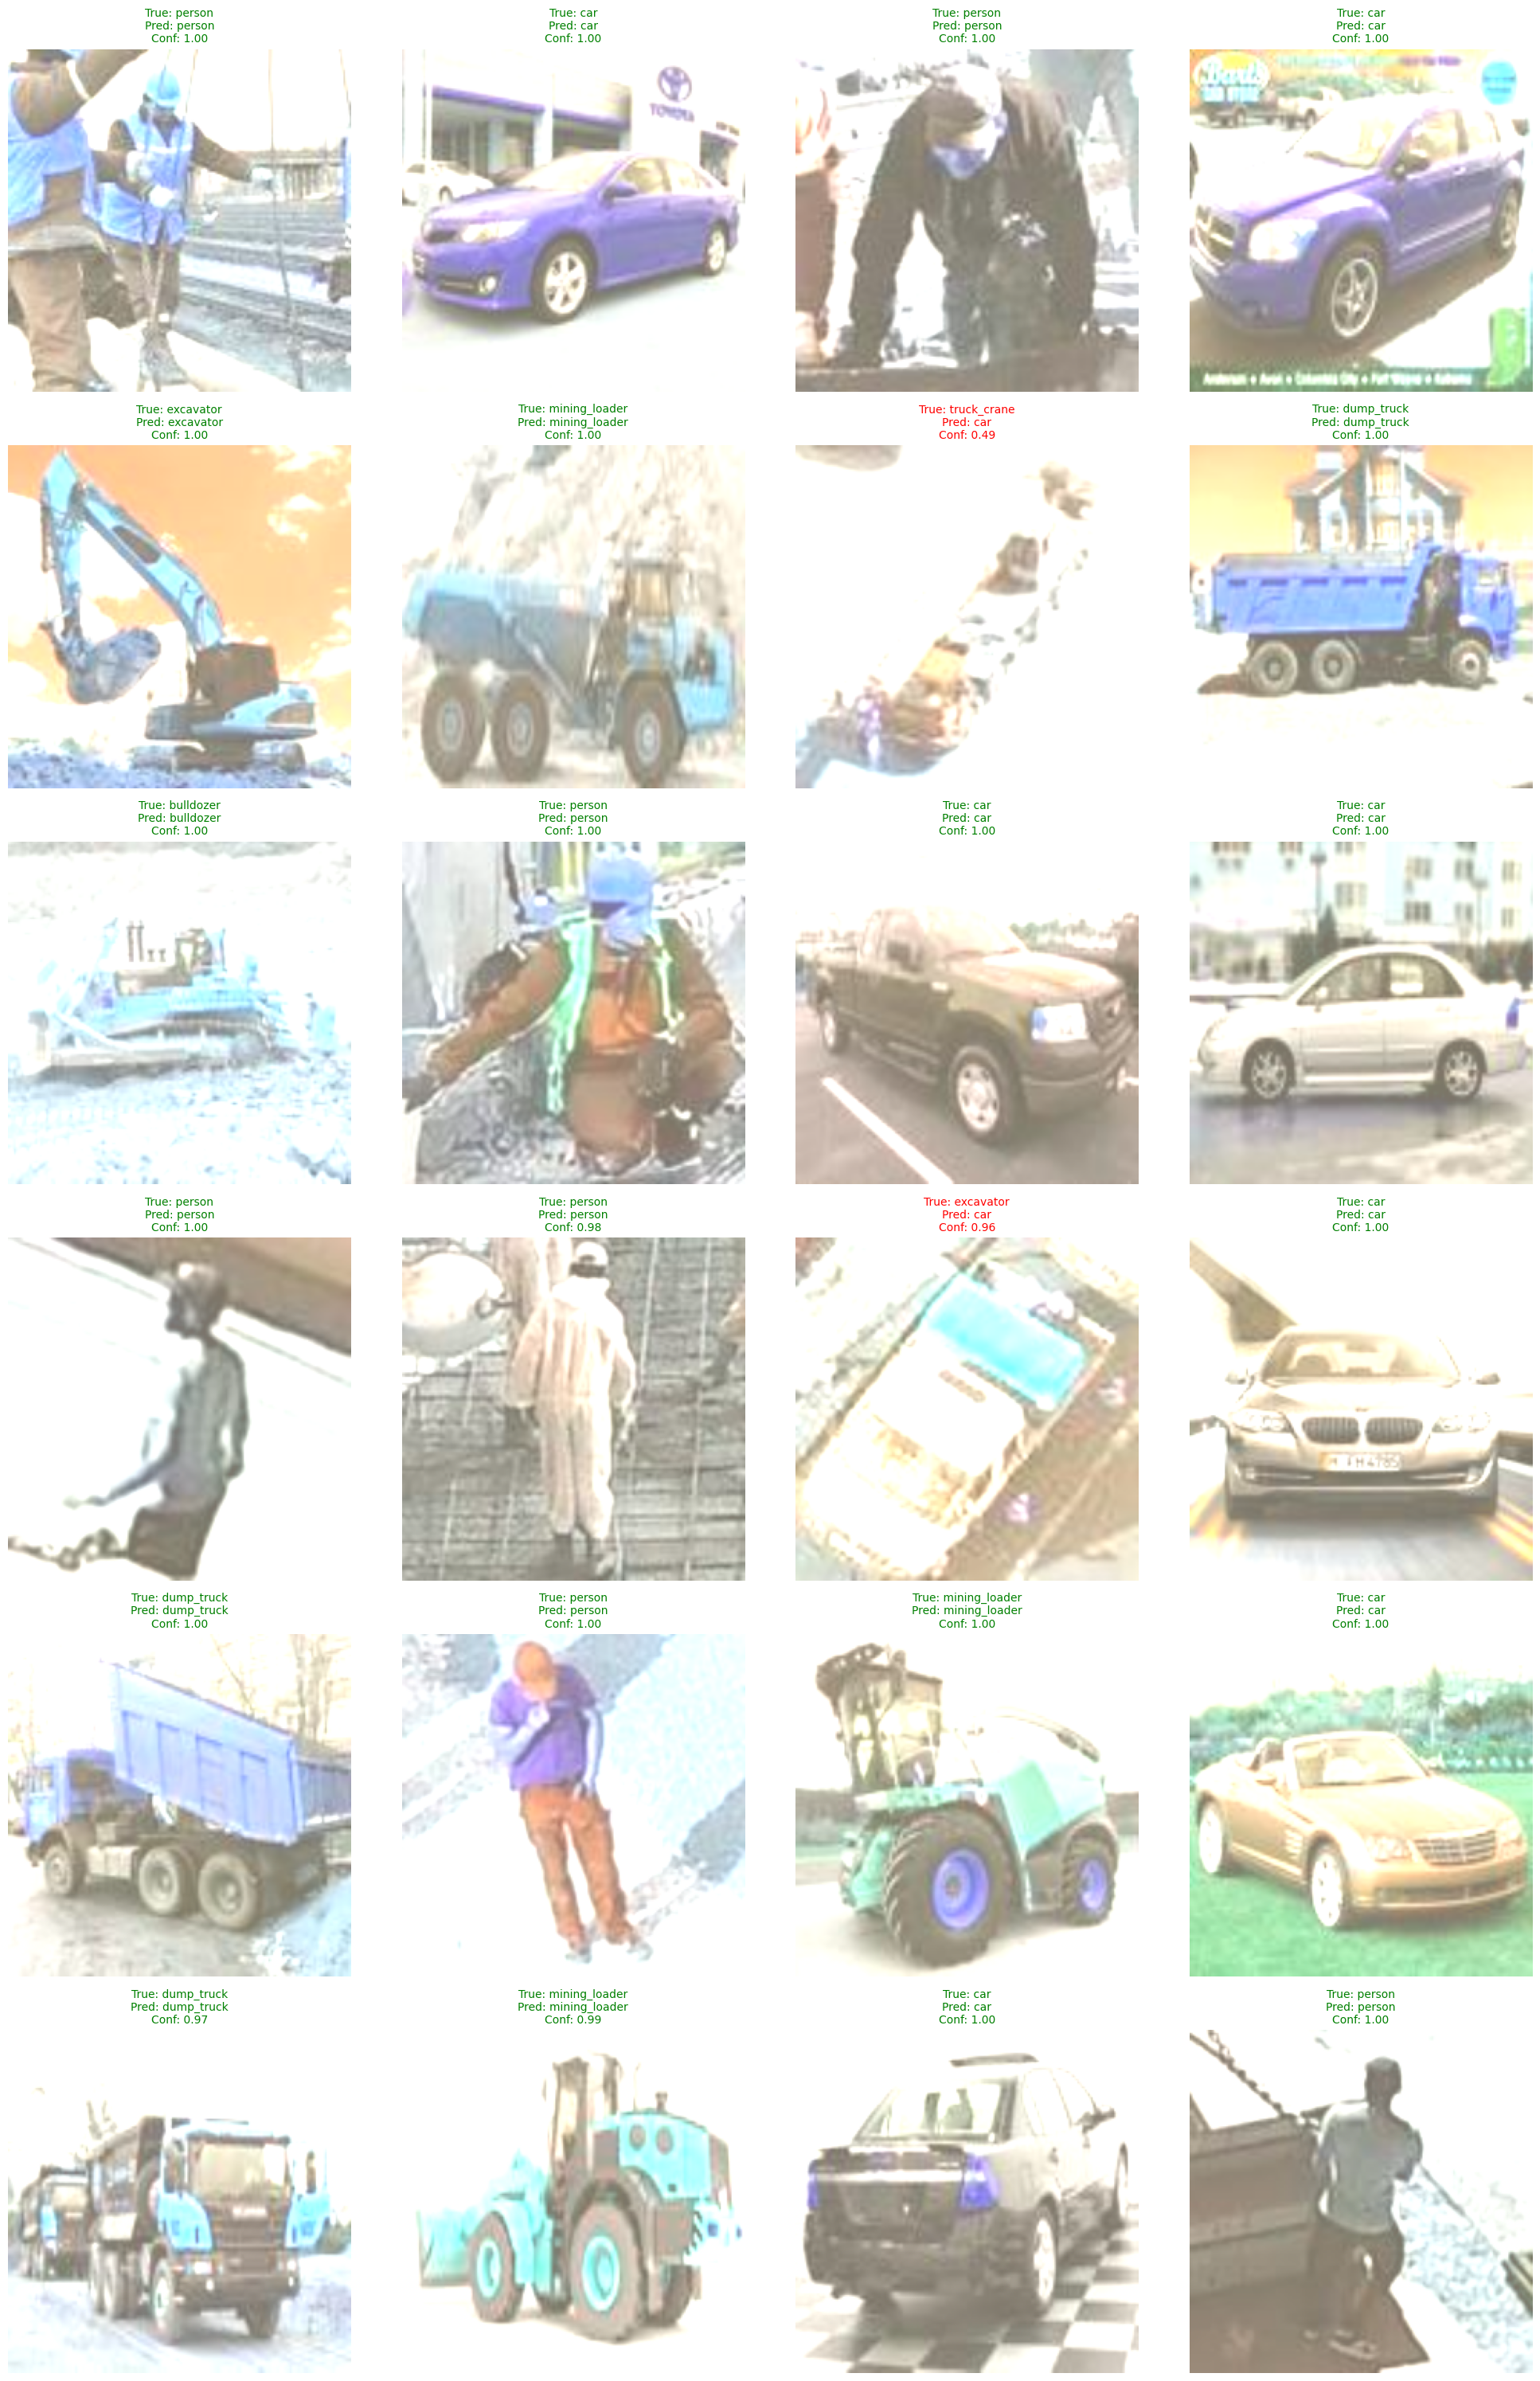

📊 Точность на 24 случайных примерах: 22/24 (91.7%)
🎯 Формат меток: ONE-HOT


In [23]:
# рандом УНИВЕРСАЛЬНАЯ ВЕРСИЯ (работает с любым форматом)

def test_random_predictions_universal(model, dataset, class_names, num_samples=12):
    """
    Универсальная версия для любого формата меток
    """
    # Собираем все изображения и метки
    all_images = []
    all_labels = []
    
    for images, labels in dataset:
        all_images.append(images.numpy())
        all_labels.append(labels.numpy())
    
    all_images = np.concatenate(all_images, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    # Выбираем случайные индексы
    total_samples = len(all_images)
    indices = np.random.choice(total_samples, min(num_samples, total_samples), replace=False)
    
    selected_images = all_images[indices]
    selected_labels = all_labels[indices]
    
    # Предсказания
    predictions = model.predict(selected_images, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # АВТОМАТИЧЕСКОЕ ОПРЕДЕЛЕНИЕ ФОРМАТА МЕТОК
    if len(selected_labels.shape) == 1:  # SPARSE labels
        true_classes = selected_labels
        label_format = "SPARSE"
    else:  # ONE-HOT labels
        true_classes = np.argmax(selected_labels, axis=1)
        label_format = "ONE-HOT"
    
    print(f"🔍 Обнаружен формат меток: {label_format}")
    
    # Создаем сетку
    cols = 4
    rows = (len(indices) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    correct = 0
    for i, idx in enumerate(indices):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        
        # Умная денормализация
        image = selected_images[i].copy()
        
        # Автоматическое определение диапазона
        if image.min() >= -1 and image.max() <= 1:
            image = (image + 1) * 127.5
        elif image.min() >= 0 and image.max() <= 1:
            image = image * 255
        else:
            # ImageNet нормализация
            image[..., 0] += 103.939
            image[..., 1] += 116.779  
            image[..., 2] += 123.68
        
        image = np.clip(image, 0, 255).astype('uint8')
        image = image[..., ::-1]  # BGR to RGB
        
        ax.imshow(image)
        
        true_class = class_names[true_classes[i]]
        pred_class = class_names[predicted_classes[i]]
        confidence = np.max(predictions[i])
        
        color = 'green' if true_class == pred_class else 'red'
        if true_class == pred_class:
            correct += 1
            
        ax.set_title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}", 
                    color=color, fontsize=10)
        ax.axis('off')
    
    # Скрываем пустые оси
    for i in range(len(indices), rows * cols):
        row = i // cols
        col = i % cols
        if rows > 1:
            axes[row, col].axis('off')
        else:
            axes[col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    accuracy = correct / len(indices) * 100
    print(f"📊 Точность на {len(indices)} случайных примерах: {correct}/{len(indices)} ({accuracy:.1f}%)")
    print(f"🎯 Формат меток: {label_format}")
    
    return correct, accuracy

# Тестируем универсальную версию
print("🎲 Тестирование случайных примеров (универсальная версия)...")
correct, accuracy = test_random_predictions_universal(best_model, validation_data, CLASS_LIST, num_samples=24)

In [ ]:
# Сохраните модель

# Сохраняем обученную модель
model.save('cats_dogs_classifier.h5')
print("💾 Модель сохранена как 'cats_dogs_classifier.h5'")

# Или сохраняем только веса
model.save_weights('cats_dogs_weights.h5')
print("💾 Веса сохранены как 'cats_dogs_weights.h5'")

In [32]:
# Сохраняем в современном формате
model.save('best_model_scotp-2.keras')
print("💾 Модель сохранена как 'best_model_1.keras'")

💾 Модель сохранена как 'best_model_1.keras'
